# Using xmip and regionmask to create ocean basin masks

<div style="border: 2px solid #006d77; background-color: #83c5be; padding: 10px; margin-bottom: 10px; width: 40%;">
  <h3>Notebook Deliverables:</h3>
  <ul>
    <li>Compute Coriolis parameter and store it in an xarray object</li>
    <li>Download ocean basin masks</li>
    <li>Apply masks to ocean data </li>
  </ul>
</div>

In [11]:
import regionmask
from xmip.regionmask import merged_mask
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [18]:
# define 1x1 grid
import numpy as np
dx = 0.1
lon = np.arange(dx, 360 + dx, dx)
lat = np.arange(90 - dx, -90 - dx, -dx)
LON, LAT = np.meshgrid(lon, lat)

omega = 2 * np.pi / 86400 #Angular rotation of Earth in rad/s
coriolis = 2 * omega * np.sin(np.deg2rad(LAT)) #Coriolis Force

ds = xr.Dataset()
ds["lon"] = xr.DataArray(lon, dims=("lon"))
ds["lat"] = xr.DataArray(lat, dims=("lat"))
ds['coriolis'] = (('lat', 'lon'), coriolis)

In [19]:
basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50
mask = merged_mask(basins,ds)

/Users/anthonymeza/miniforge3/lib/python3.11/site-packages/regionmask/core/mask.py:179: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


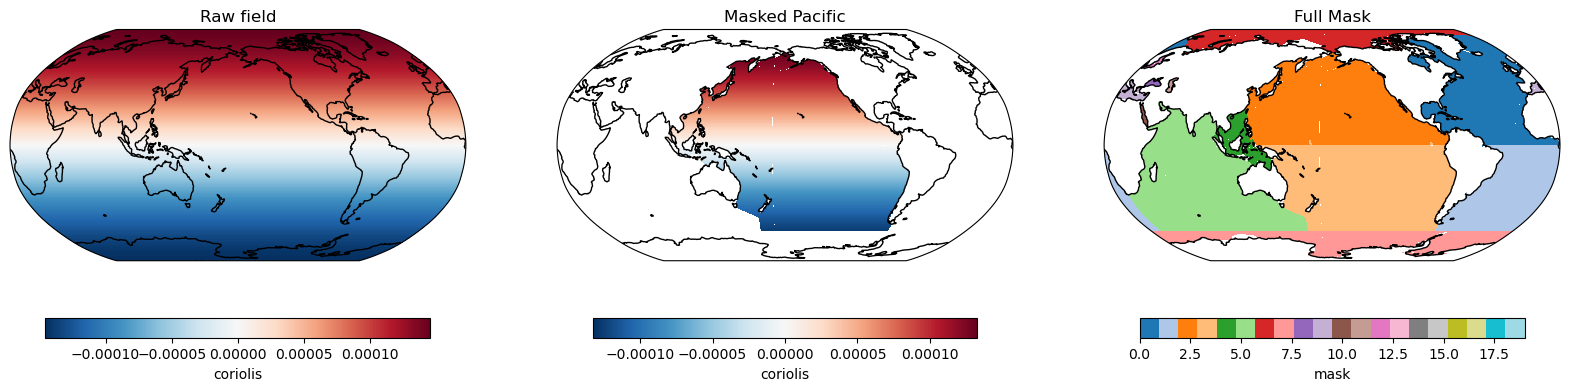

In [20]:
cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[20,5], subplot_kw={'projection':ccrs.Robinson(190)})
ds["coriolis"].plot(ax=ax1, **kwargs)
ax1.set_title(f"Raw field")

ds_masked = ds["coriolis"].where(np.logical_or(np.logical_or(mask == 2, mask==3),mask==4)) # Pacific + Maritime Continent
ds_masked.plot(ax=ax2, **kwargs)
ax2.set_title(f"Masked Pacific")
mask.plot(ax=ax3, cmap='tab20', vmin=0, vmax=19, **kwargs)
ax3.set_title(f"Full Mask")
for ax in [ax1, ax2, ax3]:
    ax.coastlines()